In [93]:
import pydap
from pydap.client import open_url
from pydap.cas.urs import setup_session
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [22]:
def import_cmems(variable, url, username, password, lon_min, lon_max, lat_min, lat_max, start_time, end_time):
    ''' Import CMEMS data
    Writers: Felipe Vilela da Silva and Alessio Arena
    ==============================================================================
    INPUT:
       variables = adt, sla, ugosa, ugos, etc (string)
       url       = copy the OPENDAP url from CMEMS (string)
       username and password are the credentials to access CMEMS data (string)
       lon_min and lon_max indicate the western and eastern boundaries, respectively (float)
       lat_min and lat_max indicate the southern and northern boundaries, respectively (float)
       start_time and end_time indicate the start and end time: (string)
    OUTPUT:
       CMEMS data in xarray
    ==============================================================================
    '''
    
    lon_slice = slice(lon_min, lon_max)
    lat_slice = slice(lat_min, lat_max)
    time_slice = slice(start_time, end_time)

    session = setup_session(username, password, check_url=url)
    pydap_ds = open_url(url, session=session)
    store = xr.backends.PydapDataStore(pydap_ds)

    ds = xr.open_dataset(store)[variable].sel(time=time_slice).sel(longitude=lon_slice, latitude=lat_slice)
    return ds

In [ ]:
adt = import_cmems('adt', 
      'https://my.cmems-du.eu/thredds/dodsC/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D', 
      username, password, -180, 180, -60, -45, '2019-01-01', '2019-03-01')

In [27]:
lat = adt.latitude
lon = adt.longitude

In [48]:
## Below, I compute the module of the ADT gradient 
## Since we will normalize the gradient by its maximum, I think that we don't need
## the zonal (dx) and meridional (dy) derivatives. In this case, differentiate is enough
gradient = np.sqrt(adt.differentiate('longitude')**2 + adt.differentiate('latitude')**2)

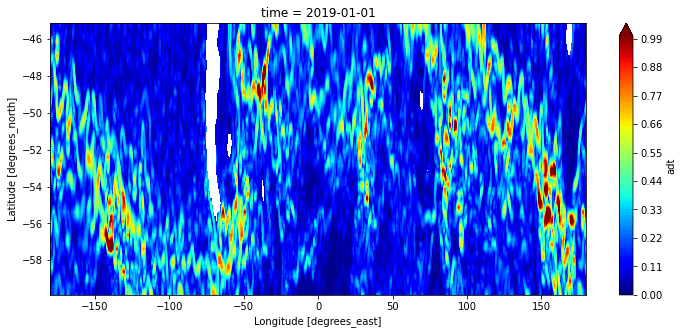

In [92]:
fig = plt.figure(figsize = (12,5))
gradient[0].plot.contourf(levels = np.arange(0,1.01,.01), cmap = 'jet', projection=ccrs.PlateCarree(),
                          extend = 'max')


## What else do we need to do?
--> Decide what is the best approach to normalize the gradient to turn the variable into percentage values

--> Choose wheter build polygons or use the contain_points to track the saildrone and ARGO floats within the peaks in the ADT gradient

--> ??